# Code for non-experimental or comparison plots

## Visualization of embeddings of NowcastPNN with DOW

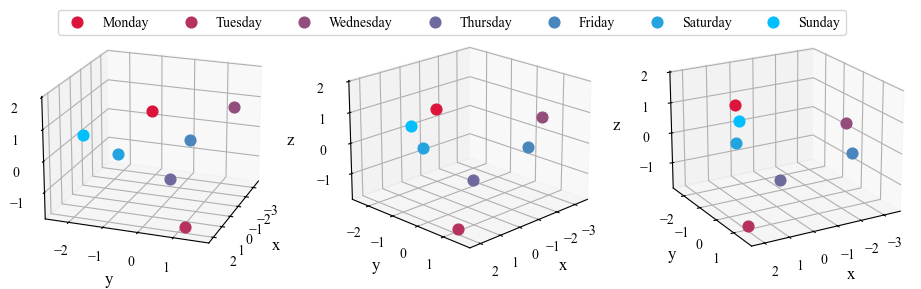

In [4]:
%reload_ext autoreload
%autoreload 3
from plotting import visualize_embeddings
visualize_embeddings(dim = 10)

## Plot of nowcasting task, divergence from available on day versus true counts

In [10]:
import pandas as pd
from epiweeks import Week, Year
from data_functions import get_dataset

dengue_df = get_dataset(weeks=False, triangle=True, past_units=40, max_delay=40, state="SP", return_df = True)

/Users/silaskoemen/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Imperial/NowcastPNN/src/data_functions.py:108: DtypeWarning: Columns (7,11,23,45,46,47,55,65,69,75,86,102) have mixed types. Specify dtype option on import or set low_memory=False.
  dengdf = pd.read_csv(path, index_col=0)#pd.read_csv(f"../data/derived/DENG{state}.csv", index_col=0)


2922 2013-01-01 00:00:00 2020-12-31 00:00:00


Still missing model predictions, could draw for e.g. 2200 in recent outbreak when trained

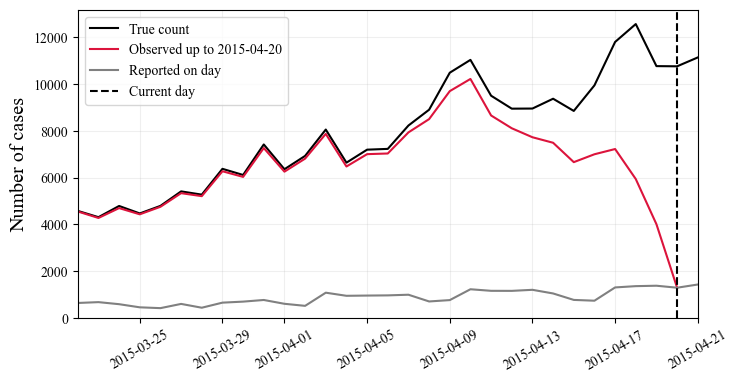

In [19]:
%reload_ext autoreload
%autoreload 3
from plotting import plot_distance_true_observed
plot_distance_true_observed(dengue_df, 800, future_units=0) # 800 orig

## Plot of how many observations available after certain delay

Use df as above, now reindex with max delay of 365 and plot sum up to which part as sum of entire

In [11]:
dengue_df_unldelay = get_dataset(weeks=False, triangle=True, past_units=40, max_delay=365, state="SP", return_df = True)

/Users/silaskoemen/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Imperial/NowcastPNN/src/data_functions.py:108: DtypeWarning: Columns (7,11,23,45,46,47,55,65,69,75,86,102) have mixed types. Specify dtype option on import or set low_memory=False.
  dengdf = pd.read_csv(path, index_col=0)#pd.read_csv(f"../data/derived/DENG{state}.csv", index_col=0)


2922 2013-01-01 00:00:00 2020-12-31 00:00:00


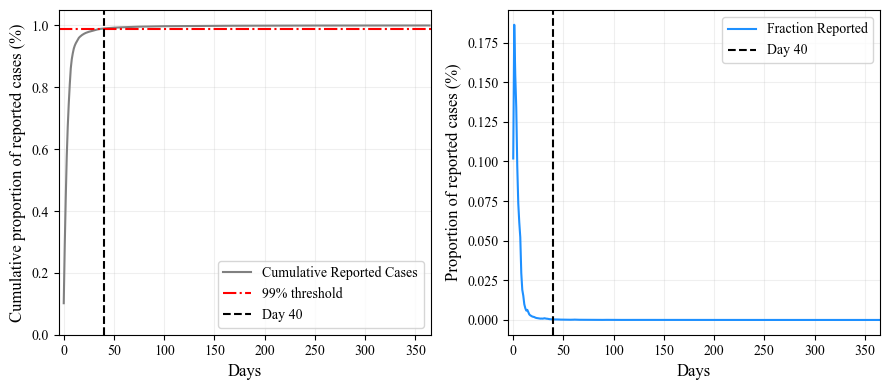

In [13]:
%reload_ext autoreload
%autoreload 3
import importlib
import plotting
importlib.reload(plotting)
from plotting import plot_max_delay_day
plot_max_delay_day(dengue_df_unldelay)

# Combined plot of nowcasting task and divergence from available on day versus true counts

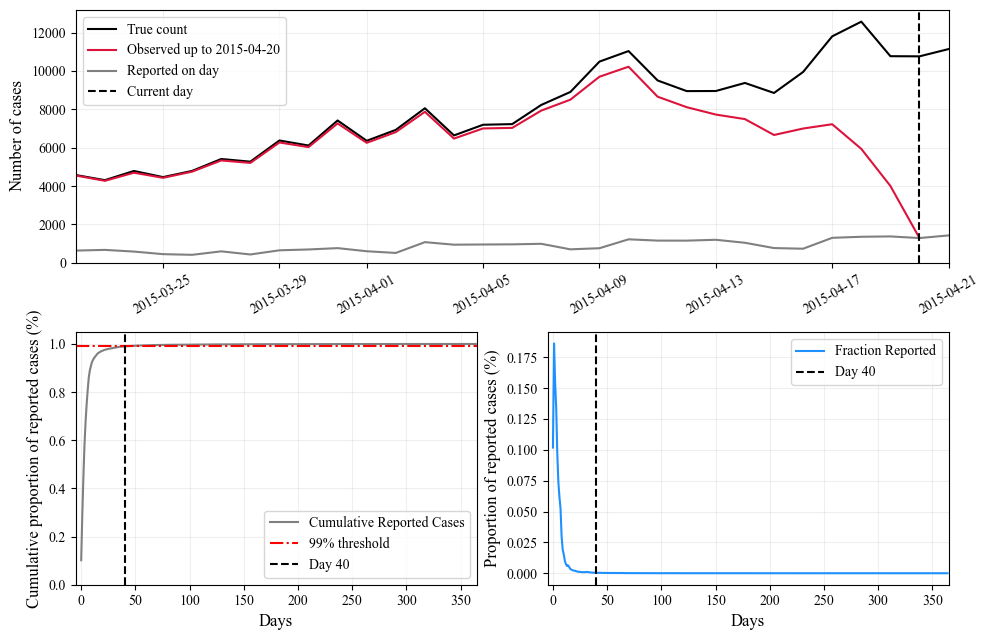

In [18]:
%reload_ext autoreload
%autoreload 3
from plotting import plot_nowcast_objective_delay_distribution
plot_nowcast_objective_delay_distribution(df_counts=dengue_df, idx=800, future_units=0, df_delays=dengue_df_unldelay, save=True, fig_size=(10, 6.5)) # 800 orig

# Counting total number of observations in time frame

In [3]:
import pandas as pd
deng = pd.read_csv("../data/derived/DENGSP.csv")

/var/folders/xr/mqd4g8995xqfhcvcyvr2smdc0000gn/T/ipykernel_4773/3214274848.py:2: DtypeWarning: Columns (7,11,23,45,46,47,55,65,69,75,86,102) have mixed types. Specify dtype option on import or set low_memory=False.
  deng = pd.read_csv("../data/derived/DENGSP.csv")


In [7]:
import datetime
deng["DT_SIN_PRI"] = pd.to_datetime(deng["DT_SIN_PRI"], format="%Y-%m-%d", errors="coerce").dt.date
len(deng[(deng["DT_SIN_PRI"] <= datetime.date(2020, 12, 31)) & (deng["DT_SIN_PRI"] >= datetime.date(2013, 1, 1))])

3557329